# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about tidying data and goes over how to make cleaning data simple and easy. The paper goes over tools for making it easier to tidy data and then use it for data analysis that consist of making data strucutes uniform and consistent and going over data manipulation. 
2. The "tidy data standard" makes the first steps of data cleaning and preparing easier because it means you do not need to start from square one and do something brand new every time you start cleaning your data. The tidy data standards intends to simplify the the beginning stages of data analysis and make the anaysis easier so that you can focus on the patterns and observations rather than trying to understand the logistics and cleaning of the data. 
3. The sentence "Like families, tidy datasets are all alike, but every messy dataset is messy in its own way" means that the tiday datasets all follow the tidy data standard which gives them similar characteristics because they are all initially cleaned up using the same data strucrtures and prepared so that they can be better understood during data analysis. Datasets that do not follow the tidy data standard are all unique because they each have missing values, outliers, and other inconsistencies that are distinct for that specific dataset, which is what the second half of the sentence from the introduction is converying. The sentence "For a given dataset, it's ususally easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." is conveying that when doing analysis on one specific dataset, it is simple to identify what the observations and variables are based on how they are organized in the data structure, however the paper displays the same data in 3 differnt tables, which can make it confusing and more complicated to identify what are the observations and what are the variables because in a broader, more general context, the data can be distributed in an unstructured way which can make it more complicated to establish what are the data observations and variables. 
4. values - what a dataset is made up of. values can either be quantitative as numbers or qualitative as a string. Every value belongs to a variable and an observation  
     variable - a variable contains all values that measure the same attribute (ex: height, temperature, duration). It is easier to describe funcitonal relationships between variables  
     observation - contains all values measured on the same unit (person, day, or race). It is easier to make comparisons between groups of observations 
5. There are 3 attributes of tidy data. In tidy data it is required that each variable forms a column, each observation forms a row, and each type of observational unit forms a table. This is a standard way of mapping the meaning of a dataset to its datastructure. 
6. The five most common problems with messy data sets are:  
    + Column headers are values, not variable names
    + Multiple variables are stored in one column
    + Variables are stored in both rows and columns
    + Multiple types of observational units are stored in the same table
    + A single observational unit is stored in multiple tables 
    The data in Table 4 are messy because variables are being stored in both the rows and the columns and the column headers are values not names. To tidy this data, we can melt the data. Data melting is when you turn rows into columns and reshape the data into a long format. 
7. Table 11 is messy data because the dates are stored as separate variables which leaves a large amount of blank values in the table. Table 12 is molten because it combines the columns from table 11 so that there is 1 variable that represents the date, and this makes the dataset more narrow, and the tidy data set, there are two measured variables so that there are less entries in the table, and the observations are more concise, rather than having two observations for each tmax and tmin. 
8. The chicken-and-egg problem that is present with tidy data is that if tidy data is only as useful as the tools that work with it, so the availability and development of tools will only be produced and used if tidy data continues to be implemented and utilized as well. Wickham hopes that others in the future will continue to build on tidy data framework to develop better solutions for data storage and even better tools to tackle the challenge of tidying data for better data anaysis. 





**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [46]:
# Question 2.1 - Cleaning Price variable in airbnb dataset

import pandas as pd
import numpy as np
df = pd.read_csv('./data/airbnb_hw.csv')
price = 'Price'


df[price] = df[price].str.replace(',','') # deleting commas 
df[price] = df[price].replace(' ',np.nan) # Notice the column replacement
df[price] = df[price].astype(float).round(2)
print(df[price].dtype)
print(df[price].head(10))


# In order to clean the Price variable, the first thing that I did was delete all of the commas that existed 
# in the entries for prices that were greater than 1,000. By deleting the commas, I was then able to convert 
# the data type from an object so that all of these data were uniform as a float, and were rounded to two
# decimal places since they represent the prices in dollars. Before doing all of this cleaning, the datatype 
# was not uniform and there were inconsistencies in the data because values over 1000 had commas, so it was
# not as easy to parse through to find certain values. Now that the data is clean, analysis can be done 
# because it can be sorted through and filtered because they are all quantitative numbers of type float where
# before, the type did not allow for ease of filtering and analysis 

float64
0    145.0
1     37.0
2     28.0
3    199.0
4    549.0
5    149.0
6    250.0
7     90.0
8    270.0
9    290.0
Name: Price, dtype: float64


In [47]:
# Question 2.2 - Cleaning Type variable in shark dataset 
sharks_df = pd.read_csv('./data/sharks.csv',low_memory=False)
var = 'Type' 
unique_types = sharks_df[var].unique()
print("Type variables before cleaning: " , unique_types) 
 # dropping the observations with no value
sharks_df.dropna(subset=[var], inplace=True)

# Combining some of the types because they are similar 
sharks_df[var] = sharks_df[var].replace(['Boating', 'Boat', 'boatomg', 'Watercraft', 'Boatomg'], 'Watercraft')
sharks_df[var] = sharks_df[var].replace(['Unconfirmed', 'Unverified', 'Questionable', 'Under investigation', 'Invalid'], 'Unknown')

unique_types = sharks_df[var].unique()
print('Type variables after cleaning: ' , unique_types) 

# In order to clean up the Type variable in the sharks dataset, the first thing That I did was see what the 
# values were that existed for observations in the data frame. There were some observations that had nan as 
# their entry, and after searching in the data set it looked like lots of these nan were empty observations 
# that did not have other data, so I dropped them from the dataframe. The next thing that I did to clean 
# the data was replace the incorrect spelling such as 'boatomg' and 'Boatomg' and also combined certain 
# values if they indicated the same result. This cleaned the data by eliminating inconsistencies in the 
# values and consolidating the values that exist for that variable if they were representing the same outcome before. 


Type variables before cleaning:  ['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg']
Type variables after cleaning:  ['Unprovoked' 'Provoked' 'Unknown' 'Watercraft' 'Sea Disaster']


In [48]:
# Question 2.3 - Dummy Variable 
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial_df = pd.read_csv(url,low_memory=False) 


In [49]:
var = 'WhetherDefendantWasReleasedPretrial'
print(pretrial_df[var].value_counts())

pretrial_df[var] = pretrial_df[var].replace(9, np.nan)


# This is a dummy variable which means it is representing a binary variable, 1s indicate that the defendant
# was released pretrial and 0s mean that the defendant was not released pretrial. In order to find what the 
# values were for this variable, I printed the unique values and found out that the values were [9 0 1], and
# there were 31 observations with 9 as the value. The 9s that exist for observations were making the data 
# very messy, so in order to clean the data I replaced all of the 9s with np.nan


1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


In [50]:
# Question 2.4 Missing values, not at random: For the pretrial data covered in the lecture, 
# clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices 
# you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

var1 = 'ImposedSentenceAllChargeInContactEvent'
var2 = 'SentenceTypeAllChargesAtConvictionInContactEvent'

missing_values = pretrial_df[var1].isnull()

new_df = pd.crosstab(missing_values,pretrial_df[var2])
print(new_df)

pretrial_df[var1] = pd.to_numeric(pretrial_df[var1], errors='coerce')

overall_mean = pretrial_df[var1].mean()

pretrial_df[var1].fillna(overall_mean,inplace=True)

total_nan = pretrial_df[var1].isnull().sum()
print('Total NaN values in "lala" : ',total_nan)

# In order to clean these data, I started by checking whether each value in the
# column is missing, and then cross tabbed the missing data with 'SentenceTypeAllChargesAtConvictionInContactEvent'
# After cross tabing the data to count the occurences of var 2 for each missing value of var 1, 
# I replaces the values that could not be converted to numberic with NaN then I filled the nan with the mean 



SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779  274
Total NaN values in "lala" :  0


**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [51]:
# Question 4.2
print("air bnb dataframe dimensions: " , df.shape)
# There are 30478 observations in in the dataframe, and 13 variables included 

df.head()

air bnb dataframe dimensions:  (30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


In [52]:
# Question 4.3: Cross tabulate `Room Type` and `Property Type`. 
# What patterns do you see in what kinds of rentals are available? 
# For which kinds of properties are private rooms more common than renting the entire property?

data = pd.crosstab(df['Room Type'], df['Property Type'])
print(data)

# The most common type of rental that is available are apartments, and when there are apartments available,
# there are varieties between renting the entire apartment or renting a private room. Another popular 
# property type is a loft, bed and breakfast, and condominium. The least popular room type is shared room,
# lots of the property types do not have this as an option to rent out. Private rooms are more common than 
# renting the entire property in Houses. There are 1258 available private rooms in housesbut only 752 entire
# homes available. 

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

<AxesSubplot: >

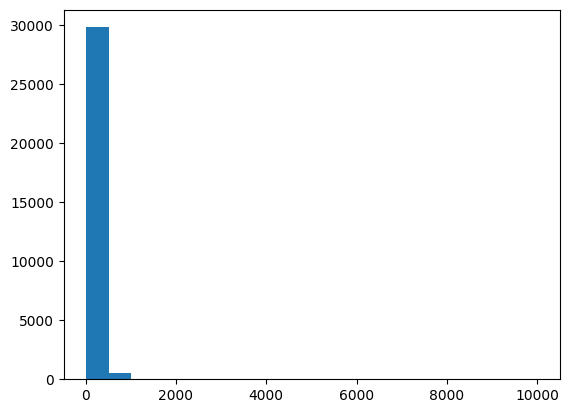

In [53]:
# Question 4.4: For `Price`, make a histogram, kernel density, box plot, and a statistical description
# of the variable.  Are the data badly scaled? Are there many outliers?
# Use `log` to transform price into a new variable, `price_log`, and take these steps again.
import numpy as np
import matplotlib.pyplot as plt

df['Price'].hist(bins=20, grid=False) # Histogram for price before doing price_log

# The histogram for the 'Price' data is very badly scaled, almost all of the data falls in one bin


<AxesSubplot: >

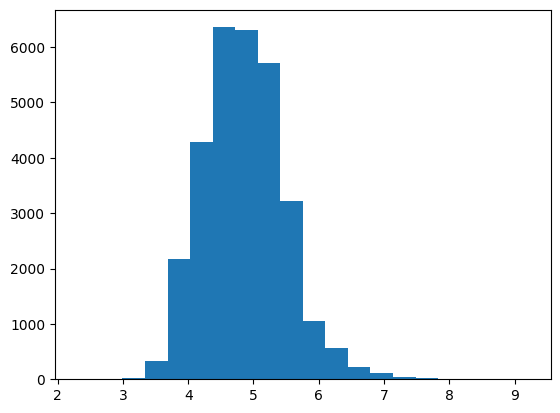

In [54]:
df['price_log'] = np.log(df['Price'])
df.loc[df['price_log']>0, 'price_log'].hist(bins=20,grid=False) # Histogram for price_log

# The histogram for 'price_log' is much better than the histogram for 'Price'. The data is
# evenly distributed and not skewed harshly, and it does not appear to have any outlier

<AxesSubplot: ylabel='Density'>

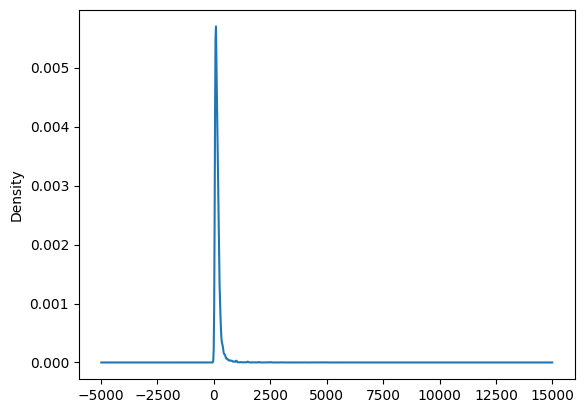

In [55]:
df['Price'].plot.density() # Kernel Density Plot for Price

# The kernel density plot for the price data is very bad because there is only one peak, and it 
# is overly smooth so it does not provice any important information about the data

<AxesSubplot: ylabel='Density'>

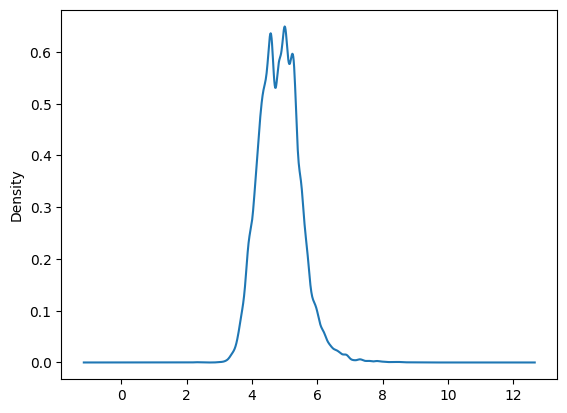

In [56]:
df['price_log'].plot.density() # Kernel Density Plot for price_log

# The kernel density plot for the 'price_log' data is much better than the 'Price' data 
# because there are more visible peaks that provide insight of the data that was not 
# present in the 'Price; kernel density plot

<AxesSubplot: >

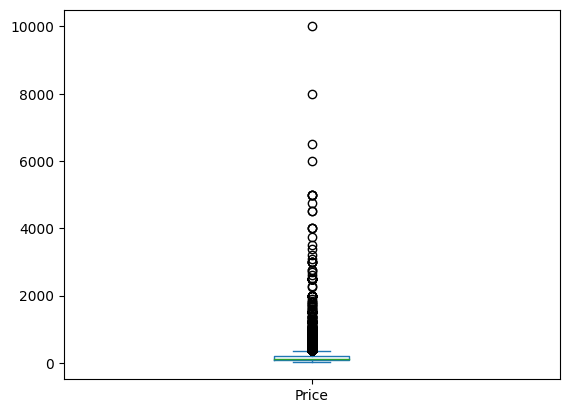

In [57]:
df['Price'].plot.box() # Box plot for price 
# The box and whisker plot for the 'Price' data is very bad because there are lots high outliers
# and the boxs with the middle 50% of the data is so small it is not possible to interpret and 
# determine any useful information about the data

<AxesSubplot: >

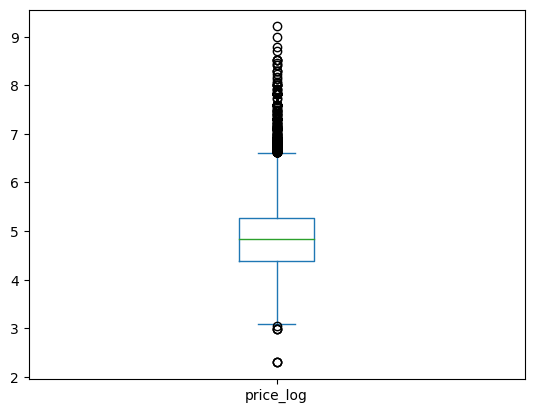

In [58]:
df['price_log'].plot.box()
# The box and whisker plot for the 'price_log' data is much better than the 'Price' data. The box
# with the middle 50% is visible, and the whiskers are also more visible so it is easier to interpret
# information about the data as opposed to the 'Price' plot where the boxes and whiskers were all too 
# close together. There are still several outliers in the 'price_log' data, but not as many as in the 
# 'Price' plot. 

In [59]:
descr = df['Price'].describe()
print('Statistical Description of Price')
print(descr)
print()

print('Statistical Description of price_log')
descr2= df['price_log'].describe()
print(descr2)

Statistical Description of Price
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

Statistical Description of price_log
count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64


<AxesSubplot: xlabel='Beds', ylabel='price_log'>

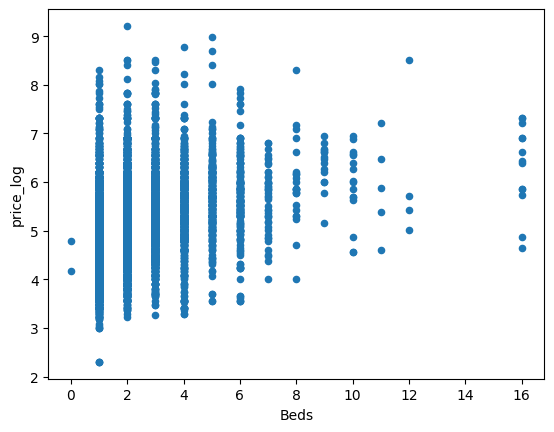

In [60]:
# Question 4.5: Make a scatterplot of `price_log` and `Beds`. 
# Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. 
# Describe any patterns you see in the average price and standard deviation in prices.

df.plot.scatter(y='price_log', x='Beds')

# As the number of beds increases, there are less dots representing rentals that are available.
# It also appears that as the number of beds increases, the concentration of the prices increases
# meaning that the average price would be increasing as the number of beds increases. 

In [61]:
var = 'Price'
group = 'Beds'
df.loc[:,[group,var]].groupby(group).describe()

# On average, the mean for the price of the airbnb increases as the number of beds increases. 
# In addition, the standard deviation of the price of the airbnb increases as the number of beds 
# increases.

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

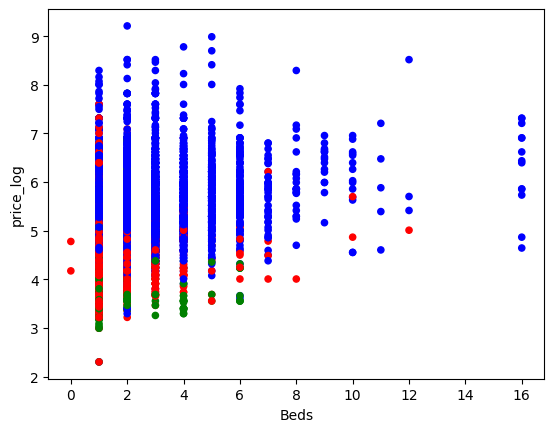

In [62]:
# Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`.
# What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`.
# Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation?
# Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

colors = {'Entire home/apt': 'blue', 'Private room': 'red', 'Shared room':'green'}

scatter_plot = df.plot.scatter(x='Beds', y='price_log', c=df['Room Type'].map(colors), colormap='viridis')
var = 'Price'
group = 'Room Type'
df.loc[:,[group,var]].groupby(group).describe()

# Based on the scatter plot below, the private rooms, which are the red dots, on average have lower prices than the
# average price of renting the entire home or entire apartment. It appears that the green dots which represent a shared
# room have the lowest average prices, then followed by private room, then the entire apartment. There are the most
# data points for renting the entire apartment or home which means this is the most popular option on air bnb


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

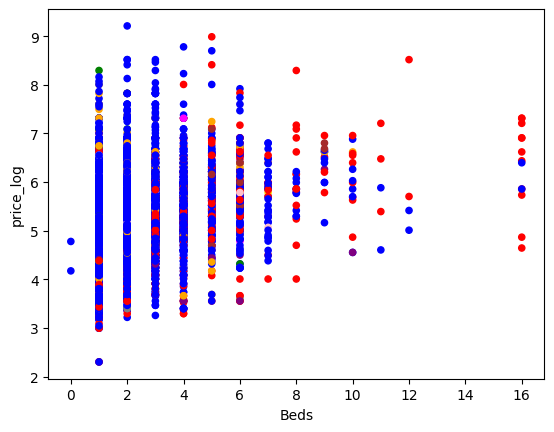

In [63]:

property_type_palette = {
    'Apartment': 'blue',
    'House': 'red',
    'Other': 'green',
    'Bed & Breakfast': 'purple',
    'Loft': 'orange',
    'Condominium': 'pink',
    'Townhouse': 'brown',
    'Dorm': 'gray',
    'Boat': 'cyan',
    'Cabin': 'lime',
    'Villa': 'magenta',
    'Bungalow': 'indigo',
    'Camper/RV': 'gold',
    'Treehouse': 'turquoise',
    'Tent': 'darkred',
    'Hut': 'darkblue',
    'Lighthouse': 'lightcoral',
    'Chalet': 'lightgreen',
    'Castle': 'lightpink'
}
default_color = 'gray'
df['Color'] = df['Property Type'].map(property_type_palette).fillna(default_color)
df.plot.scatter(x='Beds', y='price_log', c=df['Color'], colormap='viridis')

var = 'Price'
group = 'Property Type'
df.loc[:,[group,var]].groupby(group).describe()

# Since there are so many colors needed to represent property type, it is harder to gather obeservatios about the data
# the most popular type of property is apartments which are represented by the blue dots, and the second most
# popular type is houses. The number of apartments with higher number of beds available is very limited compared to the 
# number of houses with higher number of beds available. 


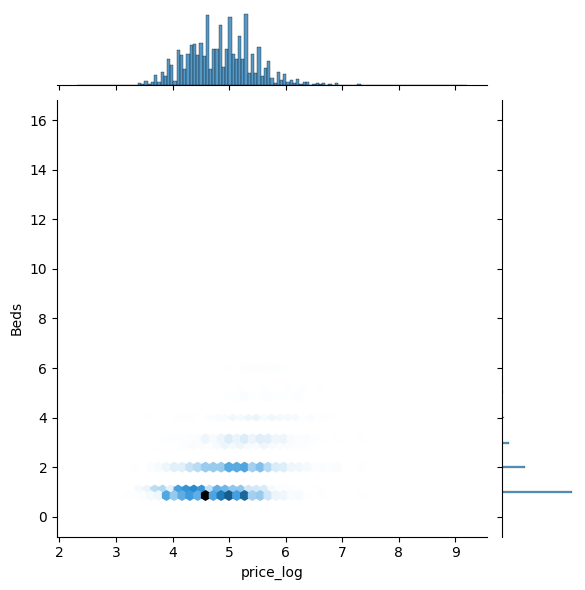

In [64]:
# Question 4.7 . We've looked a bit at this `price_log` and `Beds` scatterplot. 
# Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? 
#How does it affect the way you think about the plots in 5 and 6?

import seaborn as sns

sns.jointplot(data=df, x= 'price_log', y='Beds',kind='hex')

# The data is distributed around 1-3 beds and price_log = 4-5 . This is helpful to see because in plots
# 5 and 6 above, there is such a high volume of data points that it seems that the data is evenly distributed around
# all of the bed numbers and all of the values of price_log, so being able to see the hex plot is very insightful
# because of the ability to see where the data are actually distributed. 